In [126]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
CAMERA_URL = "http://localhost:8080/zm/cgi-bin/zms?monitor=1"

In [184]:
ds = tf.keras.preprocessing.image_dataset_from_directory('../data', label_mode='binary',
                                                         batch_size=1)

Found 8 files belonging to 2 classes.


In [20]:
for v in ds.take(1):
    pass

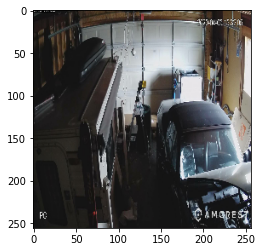

In [33]:
plt.imshow(tf.cast(v[0][0], tf.int32))

In [27]:
v[1]

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

Okay so according to above:

- 0: closed
- 1: open

(array([6.4000e+01, 7.7000e+01, 2.4000e+01, 4.7000e+01, 6.8000e+01,
        3.1100e+02, 1.3080e+03, 2.6475e+04, 1.6857e+04, 1.4590e+04,
        1.0139e+04, 7.7210e+03, 6.8600e+03, 5.5420e+03, 5.0890e+03,
        4.1070e+03, 3.5530e+03, 2.6580e+03, 2.5370e+03, 2.1920e+03,
        2.1460e+03, 2.1070e+03, 2.0060e+03, 1.9060e+03, 1.7820e+03,
        1.7840e+03, 1.6810e+03, 1.5690e+03, 1.4740e+03, 1.4180e+03,
        1.3070e+03, 1.1550e+03, 1.1010e+03, 1.2030e+03, 1.1840e+03,
        1.1310e+03, 1.1470e+03, 1.1870e+03, 1.1760e+03, 1.1970e+03,
        1.2090e+03, 1.1870e+03, 1.2640e+03, 1.2470e+03, 1.2230e+03,
        1.2460e+03, 1.1750e+03, 1.2070e+03, 1.0270e+03, 1.0660e+03,
        9.9400e+02, 1.0160e+03, 1.0530e+03, 1.0780e+03, 1.1170e+03,
        1.1190e+03, 1.1620e+03, 1.0490e+03, 1.0890e+03, 1.0450e+03,
        1.2640e+03, 1.1760e+03, 1.0020e+03, 9.6000e+02, 8.8400e+02,
        8.3000e+02, 8.4700e+02, 8.5800e+02, 8.4000e+02, 9.1100e+02,
        9.2600e+02, 8.6000e+02, 9.2300e+02, 8.58

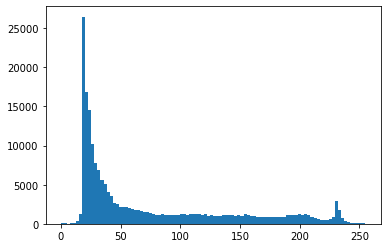

In [31]:
plt.hist(v[0].numpy().flatten(), bins=100)

In [185]:
fc = tf.feature_column.numeric_column("x", shape=(256, 256, 3))

classifier = tf.estimator.LinearClassifier(
    feature_columns=[fc],
    n_classes=2,
    config=tf.estimator.RunConfig(model_dir='tensorflow123',
                                  save_summary_steps=10,
                                  save_checkpoints_secs=10))

INFO:tensorflow:Using config: {'_model_dir': 'tensorflow123', '_tf_random_seed': None, '_save_summary_steps': 10, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 10, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [186]:
def make_input_fn():
    def fn():
        ds = tf.keras.preprocessing.image_dataset_from_directory('../data', label_mode='binary',
                                                         batch_size=1)
        ds = ds.map(lambda x, y:({"x": x}, y))
        return ds.repeat(100)
    return fn

In [77]:
ds = make_input_fn()()

Found 7 files belonging to 2 classes.


In [78]:
for v in ds.take(1):
    pass

In [84]:
print(v[0]['x'].shape)

(1, 1, 256, 256, 3)


In [187]:
classifier.train(input_fn=make_input_fn(), steps=100)

Found 8 files belonging to 2 classes.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorflow123/model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 114...
INFO:tensorflow:Saving checkpoints for 114 into tensorflow123/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 114...
INFO:tensorflow:loss = 0.0, step = 114
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 214...
INFO:tensorflow:Saving checkpoints for 214 into tensorflow123/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 214...
INFO:tensorflow:Loss for final step: 0.0.


In [188]:
results = classifier.evaluate(input_fn=make_input_fn())

Found 8 files belonging to 2 classes.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-10T20:11:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorflow123/model.ckpt-214
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 9.40890s
INFO:tensorflow:Finished evaluation at 2020-10-10-20:11:21
INFO:tensorflow:Saving dict for global step 214: accuracy = 1.0, accuracy_baseline = 0.625, auc = 1.0, auc_precision_recall = 1.0, average_loss = 0.0, global_step = 214, label/mean = 0.375, loss = 0.0, precision = 1.0, prediction/mean = 0.375, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 214: tensorflow123/model.ckpt-214


In [99]:
print(results)

{'accuracy': 1.0, 'accuracy_baseline': 0.71428573, 'auc': 1.0, 'auc_precision_recall': 1.0, 'average_loss': 0.0, 'label/mean': 0.2857143, 'loss': 0.0, 'precision': 1.0, 'prediction/mean': 0.2857143, 'recall': 1.0, 'global_step': 114}


In [ ]:
classifier.predict()

In [189]:
class Capture:

    def __init__(self, url=CAMERA_URL):
        self.url = CAMERA_URL
        self.cap = cv2.VideoCapture()
        assert self.cap.open(self.url) is True

    def get_image(self):
        rc, img_color = self.cap.read()
        # img = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
        return img_color

    def make_pred_fn(self):
        img = self.get_image()
        img = cv2.resize(img, (256, 256))
        img = np.expand_dims(img, axis=0)
        ds = tf.data.Dataset.from_tensor_slices(img)
        ds = ds.map(lambda x: {"x":x})

        return ds.batch(1)

In [190]:
cap = Capture()

In [172]:
ds = cap.make_pred_fn()

(256, 256, 3)
(1, 256, 256, 3)


In [173]:
for v in ds:
    pass
print(v)

{'x': <tf.Tensor: shape=(1, 256, 256, 3), dtype=uint8, numpy=
array([[[[103, 103, 103],
         [  3,   3,   3],
         [  2,   2,   2],
         ...,
         [ 22,  22,  22],
         [ 23,  23,  23],
         [ 22,  22,  22]],

        [[  2,   2,   2],
         [238, 238, 238],
         [ 73,  73,  73],
         ...,
         [ 22,  22,  22],
         [ 23,  23,  23],
         [ 22,  22,  22]],

        [[  2,   2,   2],
         [  1,   1,   1],
         [  6,   6,   6],
         ...,
         [ 22,  22,  22],
         [ 22,  22,  22],
         [ 22,  22,  22]],

        ...,

        [[ 27,  27,  27],
         [ 28,  28,  28],
         [ 30,  30,  30],
         ...,
         [ 20,  20,  20],
         [ 20,  20,  20],
         [ 20,  20,  20]],

        [[ 24,  24,  24],
         [ 24,  24,  24],
         [ 29,  29,  29],
         ...,
         [ 20,  20,  20],
         [ 20,  20,  20],
         [ 22,  22,  22]],

        [[ 20,  20,  20],
         [ 20,  20,  20],
         [ 2

In [115]:
list(classifier.predict(make_input_fn()))

Found 7 files belonging to 2 classes.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorflow123/model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1238030.4], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-829044.5], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-835774.56], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([122782.91], dtype=float32),
  'logistic': array([1.]

In [191]:
pred = list(classifier.predict(cap.make_pred_fn))[0]

if pred['class_ids'] == 0:
    print("closed")
else:
    print("open")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorflow123/model.ckpt-214
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
open
